In [1]:
import json

import pandas as pd

from alarms.utils import create_plot

In [2]:
# Load alarms data
filename = "ukraine_alarms.json"
with open(f"processed_data/{filename}", "r") as f:  # NOQA
    all_alarms_df = pd.DataFrame.from_dict(json.loads(f.read()))
    all_alarms_df["start_datetime"] = pd.to_datetime(all_alarms_df["start_datetime"], unit='ms')
    all_alarms_df["end_datetime"] = pd.to_datetime(all_alarms_df["end_datetime"], unit='ms')
# Load population data
with open(f"../exports/population.json", "r") as f:
    POPULATION_PER_REGION = json.loads(f.read())
# Set styling
PLOT_COLOR_LIGHT = "#d25f5f"
PLOT_COLOR_DARK = "#681010"

In [3]:
# Alerts per region
agg_params = {
    'start_datetime': ['count'],
    'duration_hours': ['sum']
}
alerts_per_region = all_alarms_df.groupby(all_alarms_df["region"]).agg(agg_params)
alerts_per_region.columns = ["alerts", "duration_hours"]
alerts_per_region.reset_index(inplace=True)
# No registered official Crimea alerts on API
alerts_per_region.loc[len(alerts_per_region)] = ['Crimea', 0, 0]
alerts_per_region.loc[len(alerts_per_region)] = ['Sevastopol region', 0, 0]
alerts_per_region["population"] = alerts_per_region["region"].apply(lambda x: POPULATION_PER_REGION[x])
alerts_per_region["years_spent"] = (alerts_per_region["population"]*alerts_per_region["duration_hours"])/24/365
alerts_per_region.sort_values(by="years_spent", ascending=True, inplace=True)
alerts_per_region

,region,alerts,duration_hours,population,years_spent
25,Sevastopol region,0,0.000000,1968550,0.000000
24,Crimea,0,0.000000,2354548,0.000000
7,Kherson region,104,77.282500,1027913,9068.457354
2,Chernivtsi region,147,147.134722,901632,15143.992451
19,Transcarpathian region,143,144.128889,1253791,20628.710471
11,Luhansk region,2,88.892500,2135913,21674.274698
18,Ternopil region,199,185.358333,1038695,21978.398863
16,Rivne region,211,186.160556,1152961,24501.810536
21,Volyn region,216,214.540556,1031421,25260.460542
8,Khmelnytskyi region,193,183.323889,1254702,26257.631283


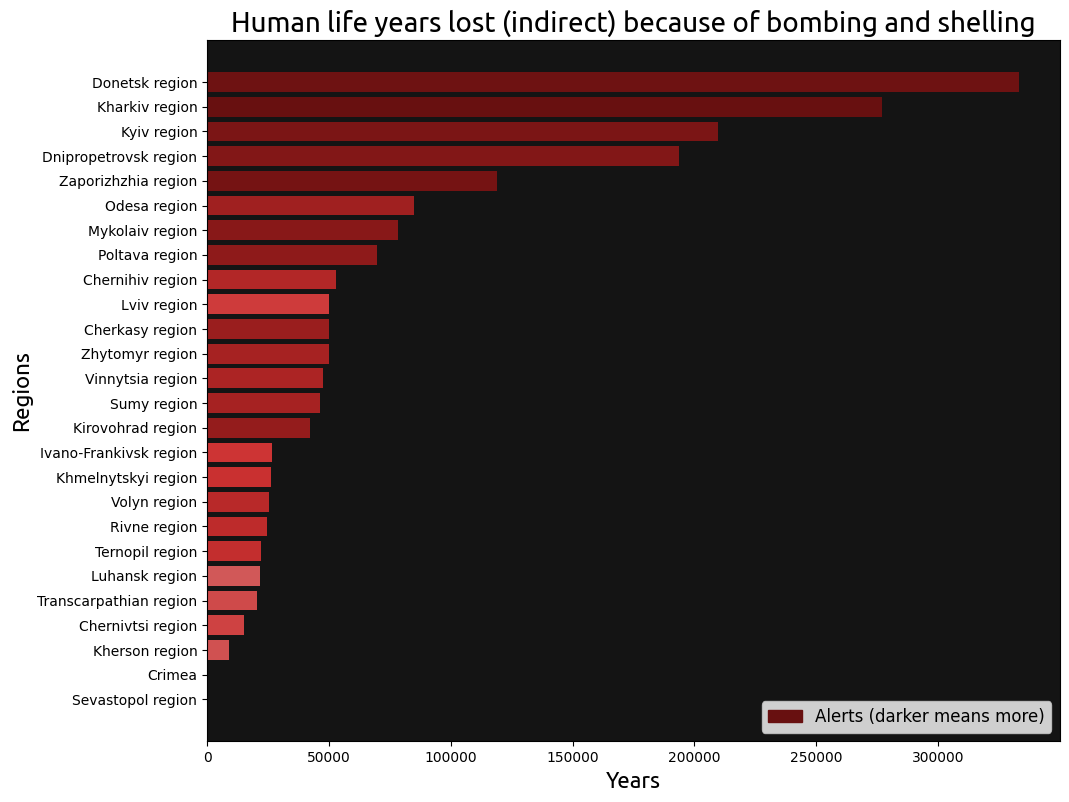

In [4]:
create_plot(
    alerts_per_region, 'region', 'years_spent',
    first_hex=PLOT_COLOR_LIGHT, last_hex=PLOT_COLOR_DARK,
    plot_title="Human life years lost (indirect) because of bombing and shelling",
    y_label="Regions", x_label="Years",
    save=False, animate=False,
    plot_color_column='alerts', plot_color_column_label='Alerts (darker means more)'
)

In [5]:
average_age_of_death = 73
total_years = round(sum(alerts_per_region["years_spent"].values))
lifes_lost = round(sum(alerts_per_region["years_spent"].values)/73)
print(f"Because of bombing and shelling, even if we don't count tens of thousands of people who died, Ukraine indirectly have lost {total_years} years of human life, which is equal to {lifes_lost} lifetimes that never happened.")

Because of bombing and shelling, even if we don't count tens of thousands of people who died, Ukraine indirectly have lost 1895951 years of human life, which is equal to 25972 lifetimes that never happened.
